In [1]:
import time
import csv
import pandas as pd #pandas
from tabulate import tabulate #visual de tablas

csv.field_size_limit(2147483647)

131072

In [2]:
#variables para las pruebas de rendimiento: (datos 2021.10-2023.09)
# Definimos el tipo de datos que queremos revisar (large, medium, small)
type_data = "small"
varN = 20
varPais = "ES"
varNivel = "junior"
varFechaIni ="2021-10-01"
varFechaFinal = "2022-12-01"
varEmpresa = "Comarch"

# Importamos los conjuntos de datos y revisamos la cantidad de filas y columnas
employments_types = pd.read_csv(f"data/{type_data}-employments_types.csv",header=None ,sep = ";",encoding = "utf-8")
jobs = pd.read_csv(f"data/{type_data}-jobs.csv" ,sep = ";",encoding = "utf-8")
multilocations = pd.read_csv(f"data/{type_data}-multilocations.csv",header=None ,sep = ";",encoding = "utf-8")
skills = pd.read_csv(f"data/{type_data}-skills.csv",header=None ,sep = ";",encoding = "utf-8")

# Mostramos la forma de cada conjunto de datos
print(f".Shape tipos de contratación: {employments_types.shape}")
print(f".Shape trabajos: {jobs.shape}")
print(f".Shape ubicaciones: {multilocations.shape}")
print(f".Shape habilidades: {skills.shape}")

# Renombramos las columnas de los conjuntos de datos
employments_types.columns = ["type", "id", "currency_salary", "salary_from", "Salary_to"]
multilocations.columns = ["city_company", "street_company", "id"]
skills.columns = ["name", "level", "id"]

# Hacemos el merge entre los conjuntos de datos utilizando la columna "id" como clave
jobs = jobs.merge(employments_types, on="id", how="left")
jobs = jobs.merge(multilocations, on="id", how="left")
jobs = jobs.merge(skills, on="id", how="left")

# Rellenamos las columnas con valores nulos con la cadena "Unknown"
jobs.fillna("Unknown", inplace=True)

# Imprimimos la forma del conjunto de datos después de los merges
print(f"\n.Shape trabajos después de los merges: {jobs.shape}")


.Shape tipos de contratación: (146449, 5)
.Shape trabajos: (114709, 16)
.Shape ubicaciones: (175111, 3)
.Shape habilidades: (324760, 3)


C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3119959333.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  jobs.fillna("Unknown", inplace=True)



.Shape trabajos después de los merges: (637443, 24)


Al completar la carga de datos de las ofertas de trabajo (**jobs-utf8.csv**) se debe reportar los siguiente:
- El total de ofertas de trabajo publicadas cargadas.
- La información de las tres primeras y tres últimas ofertas de trabajo publicadas ordenadas por la fecha de publicación. Cada elemento debe contener los siguientes detalles:
  - Fecha de publicación.
  - Título de la oferta
  - Nombre de la empresa que publica
  - Nivel de experticia de la oferta
  - País de la oferta
  - Ciudad de la oferta

In [3]:
# Primero, calculamos el total de ofertas de trabajo publicadas y lo imprimimos
print(f"El total de ofertas de trabajo publicadas cargadas en la base {type_data} son: {jobs.shape[0]}")

# Creamos una nueva columna 'published' en el DataFrame 'jobs' que contiene las fechas de publicación convertidas a formato de fecha y hora
jobs["published"] = pd.to_datetime(jobs["published_at"].str[:16])

# Ordenamos el DataFrame 'jobs' por la columna 'published' en orden descendente. Esto nos dará las ofertas de trabajo más recientes primero.
jobs.sort_values(by='published', ascending=False, inplace=True)

# Seleccionamos las primeras 3 filas del DataFrame ordenado, que corresponden a las 3 ofertas de trabajo más recientes. Seleccionamos solo algunas columnas para mostrar.
primeras_filas = jobs[['published','title', 'company_name','experience_level','country_code','city']].head(3)

# Hacemos lo mismo para las últimas 3 filas, que corresponden a las 3 ofertas de trabajo más antiguas.
ultimas_filas = jobs[['published','title','company_name','experience_level','country_code','city']].tail(3)

# Imprimimos la información de las ofertas de trabajo más recientes y más antiguas utilizando la función 'tabulate' para un formato de tabla bonito.
print("\nInformación de las tres primeras ofertas de trabajo publicadas ordenadas por la fecha de publicación:")
print(tabulate(primeras_filas, headers="keys", tablefmt="github",showindex=False))

print("\nInformación de las tres Últimas ofertas de trabajo publicadas ordenadas por la fecha de publicación:")
print(tabulate(ultimas_filas, headers="keys", tablefmt="github",showindex=False))


El total de ofertas de trabajo publicadas cargadas en la base small son: 637443

Información de las tres primeras ofertas de trabajo publicadas ordenadas por la fecha de publicación:
| published           | title                            | company_name                     | experience_level   | country_code   | city    |
|---------------------|----------------------------------|----------------------------------|--------------------|----------------|---------|
| 2023-09-01 18:20:00 | Scrum Master                     | Sunrise System sp. z o.o. sp. k. | mid                | PL             | Wroclaw |
| 2023-09-01 17:37:00 | IT Business Intelligence Manager | Elis Textile Service             | mid                | PL             | Gdansk  |
| 2023-09-01 17:37:00 | IT Business Intelligence Manager | Elis Textile Service             | mid                | PL             | Gdansk  |

Información de las tres Últimas ofertas de trabajo publicadas ordenadas por la fecha de publicación:
| pub

## Requerimiento No. 1: Listar las últimas N ofertas de trabajo según su país y nivel de experticia

Como analista de datos quiero listar las últimas N ofertas de trabajo (v.gr. las más recientes) ofrecidas en un
país filtrando por el nivel de experticia del puesto (junior, mid, senior).

Los parámetros de entrada de este requerimiento son:
- El número (N) de ofertas a listar (ej.: 3, 5, 10 o 20).
- Código del país (ej.: PL, CO, ES, etc).
- Nivel de experticia de las ofertas a consultar (junior, mid, o senior).

La respuesta esperada debe contener:
- El total de ofertas de trabajo ofrecidas según la condición (junior, mid, o senior).
- Para cada una de las ofertas de la consulta debe presentar la siguiente información:
  - Fecha de publicación de la oferta
  - Título de la oferta
  - Nombre de la empresa de la oferta
  - Nivel de experticia de la oferta (es el mismo del filtro)
  - País de la empresa de la oferta
  - Ciudad de la empresa de la oferta
  - Tamaño de la empresa de la oferta
  - Tipo de ubicación de trabajo (remote, partialy_remote, office)
  - Disponible a contratar ucranianos (Verdadero o Falso)


In [4]:
def listar_ofertas_trabajo(N, codigo_pais, nivel_experticia):
    # Filtrar las ofertas según el país y el nivel de experticia
    ofertas_filtradas = jobs[(jobs['country_code'] == codigo_pais) & (jobs['experience_level'] == nivel_experticia)]

    # Tomar las N ofertas más recientes
    ofertas_n_recientes = ofertas_filtradas.nlargest(N, 'published')

    # Imprimir la información requerida para cada oferta
    print(f"\nEl total de ofertas de trabajo ofrecidas según la condición ({nivel_experticia}): {len(ofertas_filtradas)}")
    print(f"\nInformación de las últimas ({N}) ofertas de trabajo:\n")
    #print(tabulate(ofertas_n_recientes[['published', 'title', 'company_name', 'experience_level',
    #                                    'country_code', 'city_company', 'company_size', 'workplace_type',
    #                                     'open_to_hire_ukrainians']],
    #               headers="keys", tablefmt="github", showindex=False))
    print(ofertas_n_recientes[['published', 'title', 'company_name', 'experience_level',
                                        'country_code', 'city_company', 'company_size', 'workplace_type',
                                        'open_to_hire_ukrainians']])

# Ejemplo de uso
listar_ofertas_trabajo(N=varN, codigo_pais=varPais, nivel_experticia=varNivel)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (20) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277938 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277937 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
147095 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147094 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147093 2022-08-01 14:00:00     Software Engineer - Support role       Ro

## Requerimiento No. 2: Consultar las ofertas que publicó una empresa durante un periodo especifico de tiempo

Como analista de datos quiero consultar las ofertas de trabajo publicadas por una empresa en un rango de
fechas dado.

Los parámetros de entrada de este requerimiento son:
- Nombre de la empresa.
- La fecha inicial del periodo a consultar (con formato "%Y-%m-%d").
- La fecha final del periodo a consultar (con formato "%Y-%m-%d").

La respuesta esperada debe contener:
- Número total de ofertas.
- Número total de ofertas con experticia junior.
- Número total de ofertas con experticia mid.
- Número total de ofertas con experticia senior.
- El listado de ofertas de la empresa ordenados cronológicamente por fecha y país (v.gr. Para dos ofertas con la misma fecha, el orden lo decide el país de forma alfabética). Donde para cada uno de los elementos resultantes contendrá la siguiente información:
  - Fecha de la oferta.
  - Título de la oferta.
  - Nivel de experticia requerido
  - Ciudad de la empresa de la oferta
  - País de la empresa de la oferta
  - Tamaño de la empresa de la oferta
  - Tipo de lugar de trabajo de la oferta.
  - Disponible a contratar ucranianos (Verdadero o Falso).


In [5]:
def consultar_ofertas_por_empresa_y_fechas(nombre_empresa, fecha_inicial, fecha_final):
    # Filtrar las ofertas por empresa y rango de fechas
    ofertas_filtradas = jobs[(jobs['company_name'] == nombre_empresa) &
                             (jobs['published'] >= fecha_inicial) &
                             (jobs['published'] <= fecha_final)]

    # Contar el número total de ofertas
    total_ofertas = len(ofertas_filtradas)

    # Contar el número de ofertas por nivel de experticia
    niveles_experticia = ofertas_filtradas['experience_level'].value_counts()
    num_junior = niveles_experticia.get('junior', 0)
    num_mid = niveles_experticia.get('mid', 0)
    num_senior = niveles_experticia.get('senior', 0)

    # Ordenar las ofertas por fecha y país
    ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)

    # Imprimir la información requerida para cada oferta
    print(f"Número total de ofertas: {total_ofertas}")
    print(f"\nNúmero total de ofertas con experticia junior: {num_junior}")
    print(f"Número total de ofertas con experticia mid: {num_mid}")
    print(f"Número total de ofertas con experticia senior: {num_senior}")
    print("\nListado de ofertas:\n")
    #print(tabulate(ofertas_filtradas[['published', 'title', 'experience_level', 'city_company',
    #                                  'country_code', 'company_size', 'workplace_type',
    #                                  'open_to_hire_ukrainians']],
    #               headers="keys", tablefmt="github", showindex=False))
    print(ofertas_filtradas[['published', 'title', 'experience_level', 'city_company',
                                       'country_code', 'company_size', 'workplace_type',
                                       'open_to_hire_ukrainians']])

# Ejemplo de uso
consultar_ofertas_por_empresa_y_fechas(varEmpresa,varFechaIni,varFechaFinal)


Número total de ofertas: 222

Número total de ofertas con experticia junior: 135
Número total de ofertas con experticia mid: 73
Número total de ofertas con experticia senior: 14

Listado de ofertas:

                 published                                title  \
35001  2022-04-09 13:00:00                      Programista iOS   
17315  2022-04-12 12:27:00  Mlodszy konsultant ds. e⁠-⁠Commerce   
17254  2022-04-12 12:45:00           Mlodszy inzynier systemowy   
17255  2022-04-12 12:45:00           Mlodszy inzynier systemowy   
17256  2022-04-12 12:45:00           Mlodszy inzynier systemowy   
...                    ...                                  ...   
254933 2022-10-30 09:00:00   Architekt systemow informatycznych   
254934 2022-10-30 09:00:00   Architekt systemow informatycznych   
251083 2022-10-31 08:00:00           Inzynier w kulturze DevOps   
297904 2022-11-28 13:00:00                  Programista Liferay   
297984 2022-11-28 13:00:00             Administrator webMethods

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


## Requerimiento No. 3 Consultar las ofertas que se publicaron en un país durante un periodo de tiempo

Como analista de datos deseo consultar las ofertas de trabajo publicadas en un país dado su código y un
rango de fechas.

Los parámetros de entrada de este requerimiento son:

- Código del país para la consulta (ej.: PL, CO, ES, etc).
- La fecha inicial del periodo a consultar (con formato "%Y-%m-%d").
- La fecha final del periodo a consultar (con formato "%Y-%m-%d").

La respuesta esperada debe contener:
- El total de ofertas en el país en el periodo de consulta.
- El total de empresas que publicaron al menos una oferta en el país de consulta.
- Número total de ciudades del país de consulta en las que se publicaron ofertas.
- Ciudad del país de consulta con mayor número de ofertas y su conteo
- Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo
- El listado de ofertas publicadas ordenados cronológicamente por fecha y nombre de la empresa (v.gr.Para dos ofertas con la misma fecha, el orden lo decide la empresa de forma alfabética). Donde cada uno de los elementos resultantes contendrá la siguiente información:

  - Fecha de publicación de la oferta.
  - Título de la oferta.
  - Nivel de experticia requerido
  - Nombre de la empresa de la oferta
  - Ciudad de la empresa de la oferta
  - Tipo de lugar de trabajo de la oferta.
  - Tipo de trabajo, si es remoto o no
  - Disponible a contratar ucranianos.

In [6]:
def consultar_ofertas_por_pais_y_fechas(codigo_pais, fecha_inicial, fecha_final):
    # Filtrar las ofertas por código de país y rango de fechas
    ofertas_filtradas = jobs[(jobs['country_code'] == codigo_pais) &
                             (jobs['published'] >= fecha_inicial) &
                             (jobs['published'] <= fecha_final)]

    # Calcular el total de ofertas
    total_ofertas = len(ofertas_filtradas)

    # Calcular el total de empresas únicas
    total_empresas = ofertas_filtradas['company_name'].nunique()

    # Calcular el número total de ciudades con ofertas
    total_ciudades = ofertas_filtradas['city_company'].nunique()

    # Ciudad con mayor y menor número de ofertas
    ciudades_con_ofertas = ofertas_filtradas['city_company'].value_counts()
    ciudad_max_ofertas = ciudades_con_ofertas.idxmax()
    num_max_ofertas = ciudades_con_ofertas.max()
    ciudad_min_ofertas = ciudades_con_ofertas[ciudades_con_ofertas > 0].idxmin()
    num_min_ofertas = ciudades_con_ofertas[ciudades_con_ofertas > 0].min()

    # Ordenar las ofertas por fecha y nombre de la empresa
    ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)

    # Imprimir la información requerida
    print(f"Total de ofertas en en país: ({codigo_pais}) durante el período: {total_ofertas}")
    print(f"Total de empresas que publicaron al menos una oferta en el país de consulta: {total_empresas}")
    print(f"Número total de ciudades del país de consulta en las que se publicaron ofertas: {total_ciudades}")
    print(f"Ciudad del país de consulta con mayor número de ofertas y su conteo: {ciudad_max_ofertas} ({num_max_ofertas} ofertas)")
    print(f"Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: {ciudad_min_ofertas} ({num_min_ofertas} ofertas)\n")
    print("Listado de ofertas:\n")
    #print(tabulate(ofertas_filtradas[['published', 'title', 'experience_level', 'company_name',
    #                                   'city_company', 'workplace_type', 'remote_interview']],
    #               headers="keys", tablefmt="github", showindex=False))

    print(ofertas_filtradas[['published', 'title', 'experience_level', 'company_name',
                                       'city_company', 'workplace_type','remote_interview','open_to_hire_ukrainians']])
    
# Ejemplo de uso
consultar_ofertas_por_pais_y_fechas(varPais, varFechaIni, varFechaFinal)


Total de ofertas en en país: (ES) durante el período: 424
Total de empresas que publicaron al menos una oferta en el país de consulta: 43
Número total de ciudades del país de consulta en las que se publicaron ofertas: 32
Ciudad del país de consulta con mayor número de ofertas y su conteo: Barcelona (95 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Sant Cugat (1 ofertas)

Listado de ofertas:

                 published                         title experience_level  \
22379  2022-04-11 16:00:00          C# Backend Developer              mid   
22380  2022-04-11 16:00:00          C# Backend Developer              mid   
22368  2022-04-11 16:00:00          C# Backend Developer              mid   
22378  2022-04-11 16:00:00          C# Backend Developer              mid   
22377  2022-04-11 16:00:00          C# Backend Developer              mid   
...                    ...                           ...              ...   
286640 2022-11-30 1

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)


## Requerimiento No. 4 Clasificar las N ciudades con mayor número de ofertas de trabajo por experticia entre un rango de fechas

Como analista de datos deseo clasificar las N ciudades con mayor cantidad de ofertas de trabajo en un país
entre un rango de fechas y nivel de experticia de la oferta.
- El nombre del país es opcional: si el usuario ingresa un país, la consulta solo tiene en cuenta ciudades del país. En caso contrario, la consulta considera todas las ciudades que reportan ofertas de trabajo (sin considerar el país).

Los parámetros de entrada de este requerimiento son:

- El número (N) de ciudades para consulta (ej.: 3, 5, 10 o 20).
- Código del país para la consulta (ej.: PL, CO o ES). Este dato es opcional.
- Nivel de experticia de las ofertas de interés (junior, mid o senior)
- La fecha inicial del periodo a consultar (con formato "%Y-%m-%d").
- La fecha final del periodo a consultar (con formato "%Y-%m-%d").

La respuesta esperada debe contener:

- El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N)
- El total de empresas que cumplen con las condiciones de la consulta
- El total de ofertas publicadas que cumplen con las condiciones de la consulta
- El promedio del salario ofertado de todas las ofertas que cumplen con las condiciones de la consulta (si la consulta se hace para un país específico)
- Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo
- Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo
- El listado de las ciudades ordenadas por el número de ofertas publicadas y nombre de la ciuda (siguiendo ese orden de prioridad). El orden de las ciudades es de mayor a menor cantidad de ofertas de trabajo. Donde cada una de las ciudades resultantes contendrá la siguiente información:
  - Nombre de la ciudad.
  - El total de ofertas hechas en la ciudad.
  - Promedio de salario ofertado en la ciudad
  - Número de empresas que publicaron por lo menos una oferta en la ciudad
  - Nombre de la empresa con mayor número de ofertas y su conteo
  - La información de la mejor oferta por salario en la ciudad (considerando el tope más alto dado en una oferta). Se consideran solo ofertas que tengan información de salario.
  - La información de la peor oferta por salario en la ciudad (considerando el tope más bajo dado en una oferta). Se consideran solo ofertas que tengan información de salario.

Recomendaciones:
  - Antes de empezar el desarrollo del requerimiento analice los archivos e identifique posibles valores para datos como código de país, nivel de experticia, nombre de la empresa y fechas de consulta.
  - Si una sola empresa cumple con la condición, presente esta empresa como la empresa con mayor y menor número de ofertas.
  - Si al ordenar por número de ofertas dos o más ciudades presentan el mismo número, ordene las ciudades por el promedio de salario de las ofertas hechas.

In [7]:
# Convertir las columnas de salario a valores numéricos (si? es necesario)
jobs['salary_from'] = pd.to_numeric(jobs['salary_from'], errors='coerce')
jobs['Salary_to'] = pd.to_numeric(jobs['Salary_to'], errors='coerce')
    
#hacemos la columna salario promedio
jobs["salary_mean"]=(jobs['salary_from']+jobs["Salary_to"])/2

# Rellena las columnas "Salary_to" y "salary_from" con ceros (0)
jobs["Salary_to"].fillna(0, inplace=True)
jobs["salary_from"].fillna(0, inplace=True)
jobs["salary_mean"].fillna(0, inplace=True)

# Definimos una función para filtrar las ofertas de trabajo según los parámetros proporcionados
def filtrar_ofertas(codigo_pais=None, nivel_experticia=None, fecha_inicial=None, fecha_final=None):
    # Copiamos el DataFrame original
    ofertas_filtradas = jobs.copy()
    # Si se proporciona un código de país, filtramos las ofertas por país
    if codigo_pais:
        ofertas_filtradas = ofertas_filtradas[ofertas_filtradas['country_code'] == codigo_pais]
    # Si se proporciona un nivel de experticia, filtramos las ofertas por nivel de experticia
    if nivel_experticia:
        ofertas_filtradas = ofertas_filtradas[ofertas_filtradas['experience_level'] == nivel_experticia]
    # Si se proporcionan fechas inicial y final, filtramos las ofertas por fecha de publicación
    if fecha_inicial and fecha_final:
        ofertas_filtradas = ofertas_filtradas[(ofertas_filtradas['published_at'] >= fecha_inicial) &
                                              (ofertas_filtradas['published_at'] <= fecha_final)]
    # Devolvemos las ofertas filtradas
    return ofertas_filtradas

# Definimos la función principal que clasifica las ciudades por ofertas de trabajo
def clasificar_ciudades_por_ofertas(N, codigo_pais=None, nivel_experticia=None, fecha_inicial=None, fecha_final=None):
    # Filtramos las ofertas usando la función que definimos anteriormente
    ofertas_filtradas = filtrar_ofertas(codigo_pais, nivel_experticia, fecha_inicial, fecha_final)
    # Contamos el número de ofertas por ciudad
    ciudades_con_ofertas = ofertas_filtradas['city'].value_counts()
    # Ordenamos las ciudades por número de ofertas y nos quedamos con las N primeras
    ciudades_ordenadas = ciudades_con_ofertas.sort_values(ascending=False).index[:N]
    
    
    # Creamos un DataFrame con la información que queremos mostrar
    df_ciudades = pd.DataFrame({
        'Ciudad': ciudades_ordenadas,
        'Total_ofertas_hechas_en_la_ciudad.': ciudades_con_ofertas[ciudades_ordenadas],
        'Promedio_salario_ofertado_en_la_ciudad': ofertas_filtradas.groupby('city')['salary_mean'].mean()[ciudades_ordenadas].round(2),
        "Número_empresas_publicaron_minimo_una_oferta_en_la_ciudad": ofertas_filtradas.groupby('city')['company_name'].nunique()[ciudades_ordenadas],
        'Empresa_mayor_número_ofertas': ofertas_filtradas.groupby(['city', 'company_name']).size().reset_index(name='count').sort_values(['city', 'count'], ascending=[True, False]).drop_duplicates('city').set_index('city')['company_name'][ciudades_ordenadas],
        'Conteo_empresa_mayor_número_ofertas': ofertas_filtradas.groupby(['city', 'company_name']).size().reset_index(name='count').sort_values(['city', 'count'], ascending=[True, False]).drop_duplicates('city').set_index('city')['count'][ciudades_ordenadas],
        'Información_mejor_oferta_por_salario_en_ciudad': ofertas_filtradas.groupby('city')['salary_mean'].max()[ciudades_ordenadas],
        'Información_peor_oferta_por_salario_en_ciudad': ofertas_filtradas.groupby('city')['salary_mean'].min()[ciudades_ordenadas],
    })
     # Imprimir la información
    print(f"El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): {min(N, ofertas_filtradas['city'].nunique())}")
    print(f"El total de empresas que cumplen con las condiciones de la consulta: {ofertas_filtradas['company_name'].nunique()}")
    print(f"El total de ofertas publicadas que cumplen con las condiciones de la consulta: {ofertas_filtradas.shape[0]}")
    if codigo_pais:
        print(f"Promedio del salario ofertado en {codigo_pais}: {ofertas_filtradas['salary_mean'].mean().round(2)}")
    else:
        print(f"Promedio del salario ofertado en la consulta: {ofertas_filtradas['salary_mean'].mean().round(2)}")
        
    print(f"Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: {ofertas_filtradas['city'].value_counts().idxmax()} ({ofertas_filtradas['city'].value_counts().max()} ofertas)")
    print(f"Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: {ofertas_filtradas['city'].value_counts()[ofertas_filtradas['city'].value_counts() > 0].idxmin()} ({ofertas_filtradas['city'].value_counts()[ofertas_filtradas['city'].value_counts() > 0].min()} ofertas)\n")
    print("Listado de ciudades:\n")
    # Imprimimos el DataFrame en un formato de tabla
    #print(tabulate(df_ciudades, headers="keys", tablefmt="github", showindex=False))
    print(df_ciudades)

# Ejemplo de uso de la función
clasificar_ciudades_por_ofertas(N=varN , codigo_pais=varPais, nivel_experticia=varNivel, fecha_inicial=varFechaIni, fecha_final=varFechaFinal)


El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

## Requerimiento No. 5 Clasificar los N países con mayor número de ofertas de trabajo.

Como analista de datos, quiero identificar las habilidades solicitadas en los niveles de experticia publicados
en los primeros N países dado un rango de fechas.

Los parámetros de entrada de este requerimiento son:

- El número (N) de países para consulta (ej.: 3, 5, 10 o 20).
- La fecha inicial del periodo a consultar (con formato "%Y-%m-%d").
- La fecha final del periodo a consultar (con formato "%Y-%m-%d").

La respuesta esperada debe contener:
- El total de ofertas de empleo
- Número de ciudades donde se ofertó en los países resultantes de la consulta.
- Nombre del país con mayor cantidad de ofertas y su conteo
- Nombre de la ciudad con mayor cantidad de ofertas y su conteo
- Para el conjunto de las ofertas de trabajo en los países resultantes de la consulta, por cada uno de los tres niveles de experticia (junior, mid y senior) calcule y presente la siguiente información:
  - Conteo de habilidades diferentes solicitadas en ofertas de trabajo
  - Nombre de la habilidad más solicitada y su conteo en ofertas de trabajo
  - Nombre de la habilidad menos solicitada y su conteo en ofertas de trabajo
  - Nivel mínimo promedio de las habilidades
  - Conteo de empresas que publicaron una oferta con este nivel
  - Nombre de la empresa con mayor número de ofertas y su conteo
  - Nombre de la empresa con menor número de ofertas (al menos una) y su conteo
  - Número de empresas que publicaron una oferta en este nivel que tienen una o más sedes

Recomendaciones:

- Antes de empezar el desarrollo del requerimiento analice los archivos e identifique posibles valores para datos como código de país, nivel de experticia, nombre de la empresa y fechas de consulta.
- Si solo una empresa cumple con la condición, presente esta empresa como la empresa con mayor y menor número de ofertas.
- En caso de que al ordenar por número de ofertas dos o más empresas presentan el mismo número de ofertas, sobre estas empresas realice un orden alfabético ascendente.

In [8]:
def clasificar_paises(N, fecha_inicial, fecha_final):
    # Filtrar las ofertas por fecha
    ofertas_filtradas = jobs[(jobs['published'] >= fecha_inicial) & (jobs['published'] <= fecha_final)]

    # Obtener los valores únicos de la columna 'experience_level'
    niveles = jobs['experience_level'].unique()
    
    # Imprimir la información
    print(f"El total de ofertas de empleo: {len(ofertas_filtradas)}")
    print(f"Número de ciudades donde se ofertó en los países resultantes de la consulta: {min(N, ofertas_filtradas['city'].nunique())}")
    print(f"Nombre del país con mayor cantidad de ofertas y su conteo: {ofertas_filtradas['country_code'].mode()[0]} ({ofertas_filtradas['country_code'].value_counts().max()} ofertas)")
    print(f"Nombre de la ciudad con mayor cantidad de ofertas y su conteo: {ofertas_filtradas['city'].mode()[0]} ({ofertas_filtradas['city'].value_counts().max()} ofertas)")
    
    # Para cada nivel de experiencia
    for nivel in niveles:
        print(f"\nNivel de experiencia: {nivel}\n")
        
        # Filtrar las ofertas por nivel de experiencia
        ofertas_nivel = ofertas_filtradas[ofertas_filtradas['experience_level'] == nivel]

        # Si no hay ofertas para este nivel de experiencia, imprimir un mensaje y continuar con el siguiente nivel
        if ofertas_nivel.empty:
            print(f"No se encontraron datos para el nivel de experiencia {nivel}")
            continue

        # Agrupar por país y contar las ofertas
        ofertas_por_pais = ofertas_nivel.groupby('country_code').size().nlargest(N)
                  
        
        # Crear una lista para almacenar los resultados de este nivel de experiencia
        resultados = []

        # Para cada país en los N primeros países
        for pais in ofertas_por_pais.index:
            # Filtrar las ofertas por país
            ofertas_pais = ofertas_nivel[ofertas_nivel['country_code'] == pais]

            if ofertas_pais.empty:
                print(f"No se encontraron datos para el país {pais} en el nivel de experiencia {nivel}\n")
                continue

            # Añadir los resultados a la lista
            resultados.append({
                'country_code': pais,
                'Counting_different_skills_solicited_offers': ofertas_pais['name'].value_counts().nunique(),
                'Name_most_requested_skill': ofertas_pais['name'].value_counts().idxmax(),
                'Count_most_requested_skill': ofertas_pais['name'].value_counts().max(),
                "Minimum_average_skill_level": ofertas_pais['level'].mean().round(0),
                "Count_companies_Minimum_average_skill_level": ofertas_pais[ofertas_pais.groupby('company_name')['level'].transform('mean').round(0) == ofertas_pais['level'].mean().round(0)]['company_name'].nunique() ,
                f"Count_companies_published_an_offer_level({nivel})" :ofertas_pais['company_name'].nunique(),
                "Name_company_highest_number_offers_and_count": ofertas_pais['company_name'].value_counts().idxmax()+": " + str(ofertas_pais['company_name'].value_counts().max()),
                "Name_company_lowest_number_offers_and_count": ofertas_pais['company_name'].value_counts().idxmin() + ": " + str(ofertas_pais['company_name'].value_counts().min()),
                f"Number_companies_that_published_at_level({nivel})_that_have_more_locations": ofertas_pais[ofertas_pais.groupby('street')['level'].transform('count').round(0) > 1]['company_name'].nunique()                                              
                })

        # Convertir la lista de resultados en un DataFrame
        resultados_df = pd.DataFrame(resultados)

        print(resultados_df)

_ = clasificar_paises(varN, fecha_inicial=varFechaIni, fecha_final=varFechaFinal)


El total de ofertas de empleo: 308615
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (298133 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (91176 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         276   
1            GB                                          17   
2            DE                                          16   
3            US                                          14   
4            CZ                                          12   
5            NL                                          13   
6            UA                                          10   
7            ES                                           9   
8            CY                                           8   
9            AT                                          

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         221   
1            US                                          28   
2            DE                                          24   
3            GB                                          22   
4            CZ                                          14   
5            CY                                          12   
6            ES                                          11   
7            NL                                          12   
8            UA                                          11   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           RO                                           6   
13           LT                                           7   
14           SK                                        

In [9]:


#importar Excel
df.read_("Pruebas de Rendimiento/PruebaRendimiento.xlsx", index=False)



El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                   

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (5) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   

       experience_level country_code city_company company_size workplace_type  \
423800           junior           ES       Madryt          200  partly_remote   
423801           junior           ES       Madryt          200  partly_remote   
423802           junior           ES       Madryt          200  partly_remote   
423803           junior           ES       Madryt          200  part

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (5) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   

       experience_level country_code city_company company_size workplace_type  \
423800           junior           ES       Madryt          200  partly_remote   
423801           junior           ES       Madryt          200  partly_remote   
423802           junior           ES       Madryt          200  partly_remote   
423803           junior           ES       Madryt          200  part

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (5) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   

       company_name experience_level country_code city_company company_size  \
633552      Compuco              mid           ES       Madryt    Undefined   
633553      Compuco              mid           ES       Madryt    Undefined   
633554      Compuco              mid           ES       Madryt    Undefined   
567107        SEEKR              mid           ES    Barcelona    Undefined   
567108        SEEKR              mid           ES    Barcel

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   

           Promedio_salario_ofertado_en_la_ciudad  \
city             

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                   

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   

  Name_most_requested_skill  Count_most_requested_skill  \
0                       SQL                       11915   
1                    GERMAN                          88   
2                TYPESCRIPT                          57   
3                    PYTHON                          22   
4                  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (5) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   

       experience_level country_code city_company company_size workplace_type  \
627390           senior           ES    Barcelona    Undefined         remote   
627391           senior           ES    Barcelona    Undefined         remote   
627392           senior           ES    Barcelona    Undefined         remote   
631592           senior           ES       Madryt    Undefined         remote   
631591           senior           ES    

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 1522
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 21982
Promedio del salario ofertado en PL: 4958.66
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (7122 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Balice (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                                7122   
Wroclaw    Wroclaw                                2701   
Krakow      Krakow                                2571   
Gdansk      Gdansk                                1722   
Poznan      Poznan                                1562   
Lodz          Lodz                                 723   
Katowice  Katowice  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 2019
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 40595
Promedio del salario ofertado en PL: 4990.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (12429 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Zawiercie (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                               12429   
Wroclaw    Wroclaw                                4818   
Krakow      Krakow                                4653   
Gdansk      Gdansk                                3104   
Poznan      Poznan                                2882   
Katowice  Katowice                                1385   
Lodz          Lo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   
5           ES                                          11   
6           NL                                          12   
7           UA                                          10   
8           CY                                          10   
9           CH                                           6   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPES

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 3101
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 146840
Promedio del salario ofertado en PL: 10861.79
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (44851 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                               44851   
Krakow      Krakow                               18597   
Wroclaw    Wroclaw                               18553   
Gdansk      Gdansk                                9418   
Poznan      Poznan                                9256   
Katowice  Katowice                                6426   
Lodz      

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 4370
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 336353
Promedio del salario ofertado en PL: 10516.18
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (99089 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               99089   
Krakow        Krakow                               39601   
Wroclaw      Wroclaw                               38452   
Gdansk        Gdansk                               21989   
Poznan        Poznan                               21536   
Katowice    Katowice                               147

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                    P

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 1910
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 93834
Promedio del salario ofertado en PL: 16649.57
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (28895 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Wyszkow (2 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               28895   
Krakow        Krakow                               13536   
Wroclaw      Wroclaw                               13510   
Gdansk        Gdansk                                5223   
Poznan        Poznan                                4809   
Katowice    Katowice                                3749   
L

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 2828
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 241980
Promedio del salario ofertado en PL: 16363.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (71088 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Люблін (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               71088   
Krakow        Krakow                               35139   
Wroclaw      Wroclaw                               31072   
Gdansk        Gdansk                               15008   
Poznan        Poznan                               12717   
Katowice    Katowice                                9301   
L

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   
5           ES                                          11   
6           NL                                          12   
7           UA                                          10   
8           CY                                          10   
9           CH                                           6   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPES

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   
5           UA                                          16   
6           NL                                          15   
7           LT                                          10   
8      Unknown                                          11   
9           ES                                          12   

  N

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Na

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   
5           UA                                          16   
6           NL                                          15   
7           LT                                          10   
8      Unknown                                          11   
9           ES                                          12   

  N

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   
Hiszpania  Hiszpania                                   3   
Sewilla    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (10) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   

       company_name experience_level country_code city_company company_size  \
633552      Compuco     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 29
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 244
Promedio del salario ofertado en ES: 7909.54
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (130 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 130   
Madrid                          Madrid                                  48   
Madryt                          Madryt                                  38   
Manresa                        Manresa                                  15   
Alacant          

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   
5           UA                                          16   
6           NL                                          15   
7           LT                                          10   
8      Unknown                                          11   
9           ES                                          12   

  N

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 171   
Madryt                          Madryt                                 130   
Madrid                          Madrid                                  58   
Almuñecar                    Almuñecar                                  30   
Manresa         

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (10) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631590 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
560357 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560358 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560356 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560355 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   

       experience_level country_code city_company company_size workplace_type  \
627390  

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 1522
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 21982
Promedio del salario ofertado en PL: 4958.66
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (7122 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Balice (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                                7122   
Wroclaw              Wroclaw                                2701   
Krakow                Krakow                                2571   
Gdansk                Gdansk                                1722   
Poznan                Poznan                                1562   
Lodz    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 2019
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 40595
Promedio del salario ofertado en PL: 4990.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (12429 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Zawiercie (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               12429   
Wroclaw              Wroclaw                                4818   
Krakow                Krakow                                4653   
Gdansk                Gdansk                                3104   
Poznan                Poznan                                2882   
Kato

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 3101
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 146840
Promedio del salario ofertado en PL: 10861.79
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (44851 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               44851   
Krakow                Krakow                               18597   
Wroclaw              Wroclaw                               18553   
Gdansk                Gdansk                                9418   
Poznan                Poznan                                9256  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 4370
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 336353
Promedio del salario ofertado en PL: 10516.18
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (99089 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               99089   
Krakow                Krakow                               39601   
Wroclaw              Wroclaw                               38452   
Gdansk                Gdansk                               21989   
Poznan                Poznan                               21536  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 1910
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 93834
Promedio del salario ofertado en PL: 16649.57
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (28895 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Wyszkow (2 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               28895   
Krakow                Krakow                               13536   
Wroclaw              Wroclaw                               13510   
Gdansk                Gdansk                                5223   
Poznan                Poznan                                4809   
Katow

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 2828
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 241980
Promedio del salario ofertado en PL: 16363.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (71088 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Люблін (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               71088   
Krakow                Krakow                               35139   
Wroclaw              Wroclaw                               31072   
Gdansk                Gdansk                               15008   
Poznan                Poznan                               12717   
Katow

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (20) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277938 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277937 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
147095 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147094 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147093 2022-08-01 14:00:00     Software Engineer - Support role       Ro

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (20) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   
567114 2023-06-30 12:00:00                         Python Engineer   
567115 2023-06-30 12:00:00        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   
Hiszpania  Hiszpania                                   3   
Sewilla    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                          

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 29
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 244
Promedio del salario ofertado en ES: 7909.54
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (130 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 130   
Madrid                          Madrid                                  48   
Madryt                          Madryt                                  38   
Manresa                        Manresa                                  15   
Alacant          

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (20) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631590 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
560357 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560358 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560356 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560355 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560354 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560353 2023-07-01 1

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 11
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 171   
Madryt                          Madryt                                 130   
Madrid                          Madrid                                  58   
Almuñecar                    Almuñecar                                  30   
Manresa         

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                   

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (5) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   

       experience_level country_code city_company company_size workplace_type  \
423800           junior           ES       Madryt          200  partly_remote   
423801           junior           ES       Madryt          200  partly_remote   
423802           junior           ES       Madryt          200  partly_remote   
423803           junior           ES       Madryt          200  part

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (5) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   

       experience_level country_code city_company company_size workplace_type  \
423800           junior           ES       Madryt          200  partly_remote   
423801           junior           ES       Madryt          200  partly_remote   
423802           junior           ES       Madryt          200  partly_remote   
423803           junior           ES       Madryt          200  part

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   

  Name_most_requested_skill  Count_most_requested_skill  \
0                       SQL                       11915   
1                    GERMAN                          88   
2                TYPESCRIPT                          57   
3                    PYTHON                          22   
4                  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                   

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   

  Name_most_requested_skill  Count_most_requested_skill  \
0                       SQL                       11915   
1                    GERMAN                          88   
2                TYPESCRIPT                          57   
3                    PYTHON                          22   
4                  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (5) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   

       experience_level country_code city_company company_size workplace_type  \
627390           senior           ES    Barcelona    Undefined         remote   
627391           senior           ES    Barcelona    Undefined         remote   
627392           senior           ES    Barcelona    Undefined         remote   
631592           senior           ES       Madryt    Undefined         remote   
631591           senior           ES    

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 1522
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 21982
Promedio del salario ofertado en PL: 4958.66
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (7122 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Balice (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                                7122   
Wroclaw    Wroclaw                                2701   
Krakow      Krakow                                2571   
Gdansk      Gdansk                                1722   
Poznan      Poznan                                1562   
Lodz          Lodz                                 723   
Katowice  Katowice  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 2019
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 40595
Promedio del salario ofertado en PL: 4990.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (12429 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Zawiercie (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                               12429   
Wroclaw    Wroclaw                                4818   
Krakow      Krakow                                4653   
Gdansk      Gdansk                                3104   
Poznan      Poznan                                2882   
Katowice  Katowice                                1385   
Lodz          Lo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   
5           ES                                          11   
6           NL                                          12   
7           UA                                          10   
8           CY                                          10   
9           CH                                           6   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPES

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 3101
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 146840
Promedio del salario ofertado en PL: 10861.79
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (44851 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                               44851   
Krakow      Krakow                               18597   
Wroclaw    Wroclaw                               18553   
Gdansk      Gdansk                                9418   
Poznan      Poznan                                9256   
Katowice  Katowice                                6426   
Lodz      

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 4370
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 336353
Promedio del salario ofertado en PL: 10516.18
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (99089 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               99089   
Krakow        Krakow                               39601   
Wroclaw      Wroclaw                               38452   
Gdansk        Gdansk                               21989   
Poznan        Poznan                               21536   
Katowice    Katowice                               147

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                    P

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 1910
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 93834
Promedio del salario ofertado en PL: 16649.57
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (28895 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Wyszkow (2 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               28895   
Krakow        Krakow                               13536   
Wroclaw      Wroclaw                               13510   
Gdansk        Gdansk                                5223   
Poznan        Poznan                                4809   
Katowice    Katowice                                3749   
L

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 2828
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 241980
Promedio del salario ofertado en PL: 16363.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (71088 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Люблін (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               71088   
Krakow        Krakow                               35139   
Wroclaw      Wroclaw                               31072   
Gdansk        Gdansk                               15008   
Poznan        Poznan                               12717   
Katowice    Katowice                                9301   
L

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   
5           ES                                          11   
6           NL                                          12   
7           UA                                          10   
8           CY                                          10   
9           CH                                           6   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPES

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (10) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277938 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277937 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
147095 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147094 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147093 2022-08-01 14:00:00     Software Engineer - Support role       Ro

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Na

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (10) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   

       company_name experience_level country_code city_company company_size  \
633552      Compuco     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   
Hiszpania  Hiszpania                                   3   
Sewilla    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (10) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   

       company_name experience_level country_code city_company company_size  \
633552      Compuco     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 29
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 244
Promedio del salario ofertado en ES: 7909.54
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (130 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 130   
Madrid                          Madrid                                  48   
Madryt                          Madryt                                  38   
Manresa                        Manresa                                  15   
Alacant          

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (10) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631590 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
560357 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560358 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560356 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560355 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   

       experience_level country_code city_company company_size workplace_type  \
627390  

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 171   
Madryt                          Madryt                                 130   
Madrid                          Madrid                                  58   
Almuñecar                    Almuñecar                                  30   
Manresa         

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (10) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631590 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
560357 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560358 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560356 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560355 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   

       experience_level country_code city_company company_size workplace_type  \
627390  

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 1522
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 21982
Promedio del salario ofertado en PL: 4958.66
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (7122 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Balice (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                                7122   
Wroclaw              Wroclaw                                2701   
Krakow                Krakow                                2571   
Gdansk                Gdansk                                1722   
Poznan                Poznan                                1562   
Lodz    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                          12   
10           SK                

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 2019
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 40595
Promedio del salario ofertado en PL: 4990.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (12429 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Zawiercie (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               12429   
Wroclaw              Wroclaw                                4818   
Krakow                Krakow                                4653   
Gdansk                Gdansk                                3104   
Poznan                Poznan                                2882   
Kato

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 3101
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 146840
Promedio del salario ofertado en PL: 10861.79
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (44851 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               44851   
Krakow                Krakow                               18597   
Wroclaw              Wroclaw                               18553   
Gdansk                Gdansk                                9418   
Poznan                Poznan                                9256  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 4370
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 336353
Promedio del salario ofertado en PL: 10516.18
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (99089 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               99089   
Krakow                Krakow                               39601   
Wroclaw              Wroclaw                               38452   
Gdansk                Gdansk                               21989   
Poznan                Poznan                               21536  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 1910
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 93834
Promedio del salario ofertado en PL: 16649.57
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (28895 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Wyszkow (2 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               28895   
Krakow                Krakow                               13536   
Wroclaw              Wroclaw                               13510   
Gdansk                Gdansk                                5223   
Poznan                Poznan                                4809   
Katow

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 2828
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 241980
Promedio del salario ofertado en PL: 16363.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (71088 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Люблін (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               71088   
Krakow                Krakow                               35139   
Wroclaw              Wroclaw                               31072   
Gdansk                Gdansk                               15008   
Poznan                Poznan                               12717   
Katow

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (20) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277938 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277937 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
147095 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147094 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147093 2022-08-01 14:00:00     Software Engineer - Support role       Ro

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   
Hiszpania  Hiszpania                                   3   
Sewilla    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (20) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   
567114 2023-06-30 12:00:00                         Python Engineer   
567115 2023-06-30 12:00:00        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 29
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 244
Promedio del salario ofertado en ES: 7909.54
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (130 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 130   
Madrid                          Madrid                                  48   
Madryt                          Madryt                                  38   
Manresa                        Manresa                                  15   
Alacant          

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 11
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 171   
Madryt                          Madryt                                 130   
Madrid                          Madrid                                  58   
Almuñecar                    Almuñecar                                  30   
Manresa         

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                   

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     REACT                          35   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         2081   
1                          4.0                                           90   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPESCRIPT                          18   

   Minimum_average_skill_level  Count_companies_Minimum_average_skill_level  \
0                          4.0                                         1411   
1                          4.0                                           82   
2                          4.0     

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   

  Name_most_requested_skill  Count_most_requested_skill  \
0                       SQL                       11915   
1                    GERMAN                          88   
2                TYPESCRIPT                          57   
3                    PYTHON                          22   
4                  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (5) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   

       experience_level country_code city_company company_size workplace_type  \
423800           junior           ES       Madryt          200  partly_remote   
423801           junior           ES       Madryt          200  partly_remote   
423802           junior           ES       Madryt          200  partly_remote   
423803           junior           ES       Madryt          200  part

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   

  Name_most_requested_skill  Count_most_requested_skill  \
0                       SQL                       11915   
1                    GERMAN                          88   
2                TYPESCRIPT                          57   
3                    PYTHON                          22   
4                  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 5
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                   

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (5) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   

       experience_level country_code city_company company_size workplace_type  \
627390           senior           ES    Barcelona    Undefined         remote   
627391           senior           ES    Barcelona    Undefined         remote   
627392           senior           ES    Barcelona    Undefined         remote   
631592           senior           ES       Madryt    Undefined         remote   
631591           senior           ES    

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                 171   
Madryt        Madryt                                 130   
Madrid        Madrid                                  58   
Almuñecar  Almuñecar                                  30   
Manresa      Manresa                                  15   

           Promedio_salario_ofertado_en_la_ciudad  \
city       

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Na

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 1522
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 21982
Promedio del salario ofertado en PL: 4958.66
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (7122 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Balice (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                                7122   
Wroclaw    Wroclaw                                2701   
Krakow      Krakow                                2571   
Gdansk      Gdansk                                1722   
Poznan      Poznan                                1562   
Lodz          Lodz                                 723   
Katowice  Katowice  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 2019
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 40595
Promedio del salario ofertado en PL: 4990.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (12429 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Zawiercie (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                               12429   
Wroclaw    Wroclaw                                4818   
Krakow      Krakow                                4653   
Gdansk      Gdansk                                3104   
Poznan      Poznan                                2882   
Katowice  Katowice                                1385   
Lodz          Lo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   
5           ES                                          11   
6           NL                                          12   
7           UA                                          10   
8           CY                                          10   
9           CH                                           6   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPES

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 3101
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 146840
Promedio del salario ofertado en PL: 10861.79
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (44851 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

            Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                     
Warszawa  Warszawa                               44851   
Krakow      Krakow                               18597   
Wroclaw    Wroclaw                               18553   
Gdansk      Gdansk                                9418   
Poznan      Poznan                                9256   
Katowice  Katowice                                6426   
Lodz      

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 4370
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 336353
Promedio del salario ofertado en PL: 10516.18
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (99089 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               99089   
Krakow        Krakow                               39601   
Wroclaw      Wroclaw                               38452   
Gdansk        Gdansk                               21989   
Poznan        Poznan                               21536   
Katowice    Katowice                               147

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Name_most_requested_skill  Count_most_requested_skill  \
0                   ENGLISH                        5758   
1                TYPESCRIPT                          34   
2                JAVASCRIPT                          40   
3                    PYTHON                          21   
4                    P

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 1910
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 93834
Promedio del salario ofertado en PL: 16649.57
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (28895 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Wyszkow (2 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               28895   
Krakow        Krakow                               13536   
Wroclaw      Wroclaw                               13510   
Gdansk        Gdansk                                5223   
Poznan        Poznan                                4809   
Katowice    Katowice                                3749   
L

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         314   
1           DE                                          31   
2           US                                          31   
3           GB                                          29   
4           CZ                                          19   
5           UA                                          16   
6           ES                                          17   
7           CY                                          14   
8           RO                                           9   
9           NL                                          14   

  Name_most_requested_skill  Count_most_requested_skill  \
0                      JAVA                       10562   
1                    PYTHON                         117   
2                JAVASCRIPT                          78   
3                        GO                          80   
4                     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 2828
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 241980
Promedio del salario ofertado en PL: 16363.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (71088 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Люблін (1 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Warszawa    Warszawa                               71088   
Krakow        Krakow                               35139   
Wroclaw      Wroclaw                               31072   
Gdansk        Gdansk                               15008   
Poznan        Poznan                               12717   
Katowice    Katowice                                9301   
L

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         215   
1           US                                          27   
2           DE                                          23   
3           GB                                          22   
4           CZ                                          12   
5           ES                                          11   
6           NL                                          12   
7           UA                                          10   
8           CY                                          10   
9           CH                                           6   

  Name_most_requested_skill  Count_most_requested_skill  \
0                JAVASCRIPT                        4044   
1                JAVASCRIPT                          64   
2                TYPESCRIPT                          62   
3                TYPESCRIPT                          57   
4                TYPES

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   
5           UA                                          16   
6           NL                                          15   
7           LT                                          10   
8      Unknown                                          11   
9           ES                                          12   

  N

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Na

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (10) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   

       company_name experience_level country_code city_company company_size  \
633552      Compuco     

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   
Hiszpania  Hiszpania                                   3   
Sewilla    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         266   
1           GB                                          17   
2           DE                                          17   
3           US                                          13   
4           NL                                          12   
5           UA                                          10   
6           CZ                                           9   
7           ES                                           8   
8           CY                                           8   
9           AT                                           7   

  Na

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 29
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 244
Promedio del salario ofertado en ES: 7909.54
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (130 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 130   
Madrid                          Madrid                                  48   
Madryt                          Madryt                                  38   
Manresa                        Manresa                                  15   
Alacant          

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 10
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

  country_code  Counting_different_skills_solicited_offers  \
0           PL                                         380   
1           DE                                          26   
2           GB                                          24   
3           US                                          18   
4           CZ                                          15   
5           UA                                          16   
6           NL                                          15   
7           LT                                          10   
8      Unknown                                          11   
9           ES                                          12   

  N

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 10
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 171   
Madryt                          Madryt                                 130   
Madrid                          Madrid                                  58   
Almuñecar                    Almuñecar                                  30   
Manresa         

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                          

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 1522
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 21982
Promedio del salario ofertado en PL: 4958.66
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (7122 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Balice (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                                7122   
Wroclaw              Wroclaw                                2701   
Krakow                Krakow                                2571   
Gdansk                Gdansk                                1722   
Poznan                Poznan                                1562   
Lodz    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                          12   
10           SK                

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 2019
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 40595
Promedio del salario ofertado en PL: 4990.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (12429 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Zawiercie (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               12429   
Wroclaw              Wroclaw                                4818   
Krakow                Krakow                                4653   
Gdansk                Gdansk                                3104   
Poznan                Poznan                                2882   
Kato

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         115   
1            DE                                           3   
2            GB                                           3   
3            US                                           4   
4            NL                                           4   
5            IE                                           2   
6            CY                                           3   
7            CZ                                           1   
8            CA                                           1   
9            SG                                           1   
10      Unknown                                           1   
11           MY                                           1   
12           BE                                           1   
13           ES                                           1   
14           RO                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 3101
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 146840
Promedio del salario ofertado en PL: 10861.79
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (44851 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               44851   
Krakow                Krakow                               18597   
Wroclaw              Wroclaw                               18553   
Gdansk                Gdansk                                9418   
Poznan                Poznan                                9256  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 4370
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 336353
Promedio del salario ofertado en PL: 10516.18
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (99089 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Poland Remote (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               99089   
Krakow                Krakow                               39601   
Wroclaw              Wroclaw                               38452   
Gdansk                Gdansk                               21989   
Poznan                Poznan                               21536  

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 1910
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 93834
Promedio del salario ofertado en PL: 16649.57
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (28895 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Wyszkow (2 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               28895   
Krakow                Krakow                               13536   
Wroclaw              Wroclaw                               13510   
Gdansk                Gdansk                                5223   
Poznan                Poznan                                4809   
Katow

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 262656
Total de empresas que publicaron al menos una oferta en el país de consulta: 4056
Número total de ciudades del país de consulta en las que se publicaron ofertas: 530
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (56399 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Poland Remote (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
272324 2022-10-31 21:18:00                        Java Developer   
272

El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 20
El total de empresas que cumplen con las condiciones de la consulta: 2828
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 241980
Promedio del salario ofertado en PL: 16363.35
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Warszawa (71088 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Люблін (1 ofertas)

Listado de ciudades:

                      Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                               
Warszawa            Warszawa                               71088   
Krakow                Krakow                               35139   
Wroclaw              Wroclaw                               31072   
Gdansk                Gdansk                               15008   
Poznan                Poznan                               12717   
Katow

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


Total de ofertas en en país: (PL) durante el período: 618928
Total de empresas que publicaron al menos una oferta en el país de consulta: 5660
Número total de ciudades del país de consulta en las que se publicaron ofertas: 897
Ciudad del país de consulta con mayor número de ofertas y su conteo: Warszawa (114144 ofertas)
Ciudad del país de consulta con menor número de ofertas (al menos una) y su conteo: Warka (1 ofertas)

Listado de ofertas:

                 published                                 title  \
35002  2022-04-09 13:00:00  Senior Software Development Engineer   
35003  2022-04-09 13:00:00  Senior Software Development Engineer   
35004  2022-04-09 13:00:00  Senior Software Development Engineer   
35005  2022-04-09 13:00:00  Senior Software Development Engineer   
35007  2022-04-09 13:00:00  Senior Software Development Engineer   
...                    ...                                   ...   
605456 2023-09-01 17:37:00      IT Business Intelligence Manager   
605455 202

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                           7   
10           FR                                           7   
11           SK                                           6   
12      Unknown                                           5   
13           SE                                           5   
14           IE                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 2
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 6
Promedio del salario ofertado en ES: 1479.0
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Madryt (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   3   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                     2958.0   
Barcelona                                     0.0   

           Número_empresas_publicaron_minimo

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (junior): 10

Información de las últimas (20) ofertas de trabajo:

                 published                                title company_name  \
423800 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423801 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423802 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
423803 2023-02-27 19:00:00                Cloud SecOps Engineer          SIX   
277939 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277938 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
277937 2022-10-31 11:38:00  Junior DevOps Engineer (Linux, PHP)      Compuco   
147095 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147094 2022-08-01 14:00:00     Software Engineer - Support role       Roomex   
147093 2022-08-01 14:00:00     Software Engineer - Support role       Ro

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 2
El total de empresas que cumplen con las condiciones de la consulta: 3
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 10
Promedio del salario ofertado en ES: 887.4
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (7 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Barcelona (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                   7   
Barcelona  Barcelona                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city                                                
Madryt                                    1267.71   
Barcelona                                    0.00   

           Número_empresas_publicaron_min

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 272128
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (262656 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (80907 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         266   
1            GB                                          17   
2            DE                                          17   
3            US                                          13   
4            NL                                          12   
5            UA                                          10   
6            CZ                                           9   
7            ES                                           8   
8            CY                                           8   
9            AT                                          

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 5
El total de empresas que cumplen con las condiciones de la consulta: 19
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 125
Promedio del salario ofertado en ES: 4732.13
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (45 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sewilla (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Barcelona  Barcelona                                  45   
Madryt        Madryt                                  39   
Madrid        Madrid                                  30   
Almuñecar  Almuñecar                                   8   
Sewilla      Sewilla                                   3   

           Promedio_salario_ofertado_en_la_ciudad  \
city           

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 25
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 212
Promedio del salario ofertado en ES: 4973.9
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Madryt (75 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Hiszpania (3 ofertas)

Listado de ciudades:

              Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                       
Madryt        Madryt                                  75   
Barcelona  Barcelona                                  57   
Almuñecar  Almuñecar                                  38   
Madrid        Madrid                                  30   
Walencja    Walencja                                   6   
Hiszpania  Hiszpania                                   3   
Sewilla    

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (mid): 212

Información de las últimas (20) ofertas de trabajo:

                 published                                   title  \
633552 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633553 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
633554 2023-09-01 07:00:00  Project Manager (Digital/CRM projects)   
567107 2023-06-30 12:00:00                         Python Engineer   
567108 2023-06-30 12:00:00                         Python Engineer   
567109 2023-06-30 12:00:00                         Python Engineer   
567110 2023-06-30 12:00:00                         Python Engineer   
567111 2023-06-30 12:00:00                         Python Engineer   
567112 2023-06-30 12:00:00                         Python Engineer   
567113 2023-06-30 12:00:00                         Python Engineer   
567114 2023-06-30 12:00:00                         Python Engineer   
567115 2023-06-30 12:00:00        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         215   
1            US                                          27   
2            DE                                          23   
3            GB                                          22   
4            CZ                                          12   
5            ES                                          11   
6            NL                                          12   
7            UA                                          10   
8            CY                                          10   
9            CH                                           6   
10           IE                                           6   
11           FR                                           7   
12           SE                                           5   
13           SG                                           8   
14           FI                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 7
El total de empresas que cumplen con las condiciones de la consulta: 29
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 244
Promedio del salario ofertado en ES: 7909.54
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (130 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 130   
Madrid                          Madrid                                  48   
Madryt                          Madryt                                  38   
Manresa                        Manresa                                  15   
Alacant          

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)


El total de ofertas de empleo: 637443
Número de ciudades donde se ofertó en los países resultantes de la consulta: 20
Nombre del país con mayor cantidad de ofertas y su conteo: PL (618928 ofertas)
Nombre de la ciudad con mayor cantidad de ofertas y su conteo: Warszawa (182830 ofertas)

Nivel de experiencia: mid

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         380   
1            DE                                          26   
2            GB                                          24   
3            US                                          18   
4            CZ                                          15   
5            UA                                          16   
6            NL                                          15   
7            LT                                          10   
8       Unknown                                          11   
9            ES                                         

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         314   
1            DE                                          31   
2            US                                          31   
3            GB                                          29   
4            CZ                                          19   
5            UA                                          16   
6            ES                                          17   
7            CY                                          14   
8            RO                                           9   
9            NL                                          14   
10           FI                                          15   
11           CH                                          11   
12           HU                                          11   
13           SK                                          13   
14           PT                                        

   country_code  Counting_different_skills_solicited_offers  \
0            PL                                         155   
1            DE                                           6   
2            GB                                           3   
3            CY                                           6   
4            NL                                           6   
5            US                                           4   
6            IE                                           2   
7            CZ                                           2   
8            SK                                           2   
9       Unknown                                           3   
10           IT                                           2   
11           CA                                           1   
12           SG                                           1   
13           ES                                           2   
14           MY                                        

El total de ciudades que cumplen con las condiciones de la consulta (valor menor o igual a N): 11
El total de empresas que cumplen con las condiciones de la consulta: 40
El total de ofertas publicadas que cumplen con las condiciones de la consulta: 429
Promedio del salario ofertado en ES: 7282.81
Nombre de la ciudad con mayor cantidad de ofertas de empleos y su conteo: Barcelona (171 ofertas)
Nombre de la ciudad con menor cantidad de ofertas de empleos y su conteo: Sant Cugat (1 ofertas)

Listado de ciudades:

                                Ciudad  Total_ofertas_hechas_en_la_ciudad.  \
city                                                                         
Barcelona                    Barcelona                                 171   
Madryt                          Madryt                                 130   
Madrid                          Madrid                                  58   
Almuñecar                    Almuñecar                                  30   
Manresa         

C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\3018259661.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'company_name'], inplace=True)
C:\Users\Cristian Agudelo\AppData\Local\Temp\ipykernel_16228\670213634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ofertas_filtradas.sort_values(by=['published', 'country_code'], inplace=True)



El total de ofertas de trabajo ofrecidas según la condición (senior): 429

Información de las últimas (20) ofertas de trabajo:

                 published                       title company_name  \
627390 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627391 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
627392 2023-09-01 14:49:00  AI Engineer/Data Scientist     lemon.io   
631592 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631591 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
631590 2023-09-01 11:00:00      Senior DevOps Engineer      Compuco   
560357 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560358 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560356 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560355 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560354 2023-07-01 13:00:00   Senior Frontend Developer   Nordhealth   
560353 2023-07-01 1

# Analisis de Tiempos de Ejecución

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las estadísticas
stats = df.groupby('Requerimiento')['Tiempo de ejecución (segundos)'].agg(['mean', 'min', 'max'])

# Imprimir las estadísticas
for req in stats.index:
    print(f"Requerimiento: {req}")
    print(f"Tiempo promedio: {stats.loc[req, 'mean']:.2f} segundos")
    print(f"Tiempo mínimo: {stats.loc[req, 'min']:.2f} segundos")
    print(f"Tiempo máximo: {stats.loc[req, 'max']:.2f} segundos")
    print("\n")


Requerimiento: R1
Tiempo promedio: 0.17 segundos
Tiempo mínimo: 0.09 segundos
Tiempo máximo: 0.33 segundos


Requerimiento: R2
Tiempo promedio: 0.05 segundos
Tiempo mínimo: 0.04 segundos
Tiempo máximo: 0.07 segundos


Requerimiento: R3
Tiempo promedio: 0.26 segundos
Tiempo mínimo: 0.04 segundos
Tiempo máximo: 0.66 segundos


Requerimiento: R4
Tiempo promedio: 0.53 segundos
Tiempo mínimo: 0.25 segundos
Tiempo máximo: 1.20 segundos


Requerimiento: R5
Tiempo promedio: 1.83 segundos
Tiempo mínimo: 0.90 segundos
Tiempo máximo: 3.13 segundos


Requerimiento: Total
Tiempo promedio: 2.84 segundos
Tiempo mínimo: 1.39 segundos
Tiempo máximo: 5.12 segundos




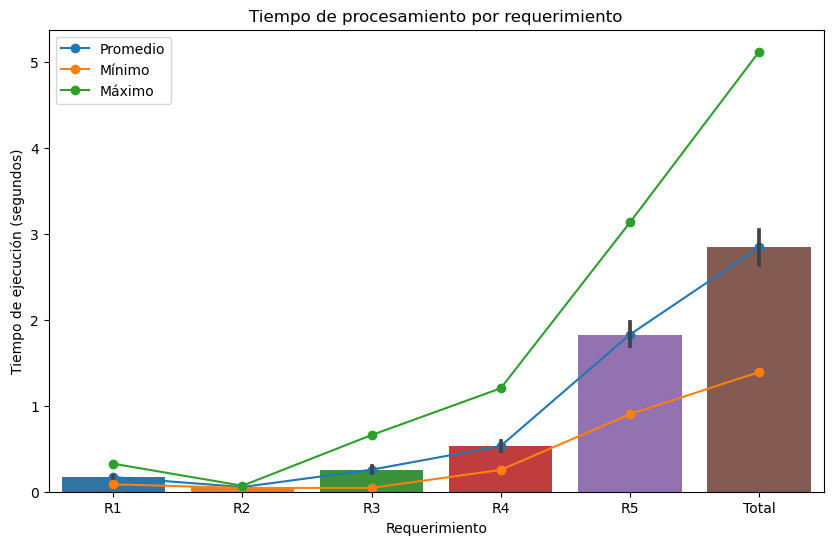

In [12]:
import matplotlib.pyplot as plt

# Calcular las estadísticas
stats = df.groupby('Requerimiento')['Tiempo de ejecución (segundos)'].agg(['mean', 'min', 'max'])

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(stats.index, stats['mean'], marker='o', label='Promedio')
plt.plot(stats.index, stats['min'], marker='o', label='Mínimo')
plt.plot(stats.index, stats['max'], marker='o', label='Máximo')
plt.xlabel('Requerimiento')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de procesamiento por requerimiento')
sns.barplot(x='Requerimiento', y='Tiempo de ejecución (segundos)', data=df)
#plt.title('Distribución del tiempo de procesamiento por requerimiento')

plt.legend()
plt.show()


In [49]:
df.describe()

,Tiempo de ejecución (segundos),N
count,648.000000,648.000000
mean,0.947666,11.666667
std,1.167491,6.240913
min,0.043807,5.000000
25%,0.083146,5.000000
50%,0.300071,10.000000
75%,1.430981,20.000000
max,5.121049,20.000000
